First Linear Regression

In [118]:
import numpy as np

X, Y = np.loadtxt("temp.txt", skiprows=1, unpack=True)



In [119]:
X

array([13.,  2., 14., 23., 13., 13.,  1., 18.,  7., 10., 26.,  3.,  3.,
       21., 22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10.,
       21.,  5.,  6., 13.])

In [120]:
Y

array([33., 16., 32., 51., 27., 25., 16., 34., 22., 17., 58., 15., 15.,
       45., 47., 13., 63., 16., 21., 37., 30., 26., 56., 23., 39., 27.,
       45., 17., 18., 23.])

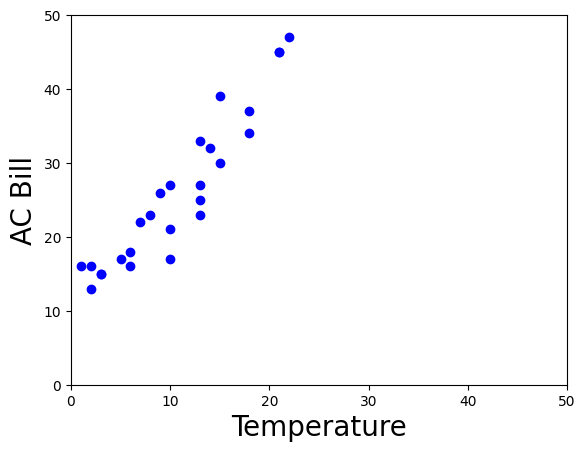

In [121]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.xlabel("Temperature", fontsize=20)  
plt.ylabel("AC Bill", fontsize=20)        
plt.axis([0, 50, 0, 50])                 
plt.plot(X, Y, "bo")                    
plt.show()    

Prediction FUnction (Straight Line)

In [122]:
def predict(X, w, b):
    return X * w + b

Test Prediction where first argument is temperature. w and b are weight and bias for the regression line

In [123]:
predict(14, 1.2, 12)

28.8

In [124]:
temperatures = np.array([14, 5, 7])
predict(temperatures, 1.2, 12)

array([28.8, 18. , 20.4])

Find Line with LOWEST ERROR (MEAN SQUARE ERROR) / LOSS (APPROXIMATION ERROR)

In [125]:
def loss(X, Y, w, b):
    predictions = predict(X, w, b)
    
    return np.average((predictions - Y) ** 2)

Takes our model (line --> w and b) and some samples (X, Y) and calculates the error of the model. 
Lower loss --> better model

In [126]:
loss(X, Y, 1.2, 12)

44.07866666666667

Training algorithm

In [127]:
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        else:
            return w, b

    raise Exception("Couldn't find a result within %d iterations" % iterations)

Train model --> set learning rate very low

In [128]:
w, b = train(X, Y, 100000, 0.001)

Iteration    0 => Loss: 1113.966667
Iteration    1 => Loss: 1112.993419
Iteration    2 => Loss: 1112.020609
Iteration    3 => Loss: 1111.048236
Iteration    4 => Loss: 1110.076301
Iteration    5 => Loss: 1109.104803
Iteration    6 => Loss: 1108.133743
Iteration    7 => Loss: 1107.163121
Iteration    8 => Loss: 1106.192937
Iteration    9 => Loss: 1105.223189
Iteration   10 => Loss: 1104.253880
Iteration   11 => Loss: 1103.285008
Iteration   12 => Loss: 1102.316574
Iteration   13 => Loss: 1101.348577
Iteration   14 => Loss: 1100.381018
Iteration   15 => Loss: 1099.413897
Iteration   16 => Loss: 1098.447213
Iteration   17 => Loss: 1097.480967
Iteration   18 => Loss: 1096.515158
Iteration   19 => Loss: 1095.549787
Iteration   20 => Loss: 1094.584853
Iteration   21 => Loss: 1093.620357
Iteration   22 => Loss: 1092.656299
Iteration   23 => Loss: 1091.692679
Iteration   24 => Loss: 1090.729495
Iteration   25 => Loss: 1089.766750
Iteration   26 => Loss: 1088.804442
Iteration   27 => Loss: 1087

In [129]:
w

1.779999999999915

In [130]:
b

7.687000000000902

Plot

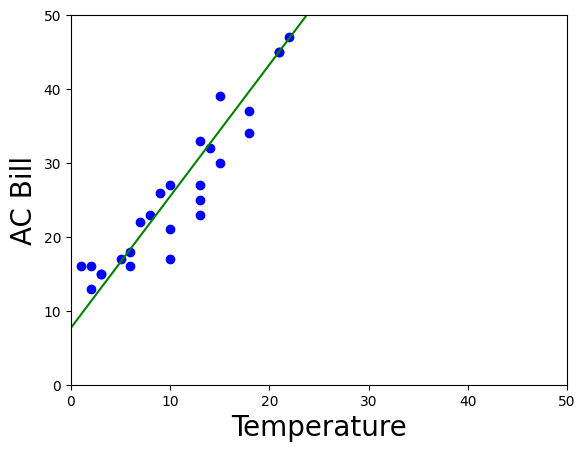

In [131]:
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("AC Bill", fontsize=20)
plt.axis([0, 50, 0, 50])
plt.plot(X, Y, "bo")


plt.plot([0, 50], [b, predict(50, w, b)], color="g")


plt.show()

In [132]:
temperature = 50
print(f"{predict(50, w, b):.2f}")

96.69


In [133]:
np.average(2)

2.0